In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Read dataset and split into training / test sets

In [2]:
data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

# Feature selection

In [3]:
numerical_train = train.select_dtypes(include=['int', 'float'])
numerical_train.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900


In [4]:
drop_cols = ['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold']
numerical_train = numerical_train.drop(drop_cols, axis=1)
numerical_train.head()

,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,1,20,141.0,31770,6,5,112.0,639.0,0.0,441.0,...,2.0,528.0,210,62,0,0,0,0,0,215000
1,2,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,...,1.0,730.0,140,0,0,0,120,0,0,105000
2,3,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,...,1.0,312.0,393,36,0,0,0,0,12500,172000
3,4,20,93.0,11160,7,5,0.0,1065.0,0.0,1045.0,...,2.0,522.0,0,0,0,0,0,0,0,244000
4,5,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,...,2.0,482.0,212,34,0,0,0,0,0,189900


In [5]:
null_series = numerical_train.isnull().sum()
null_series.head()

Order             0
MS SubClass       0
Lot Frontage    249
Lot Area          0
Overall Qual      0
dtype: int64

In [6]:
full_cols_series = null_series[null_series == 0]
full_cols_series

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

# Correlations with SalesPrice

In [7]:
train_subset = train[full_cols_series.index]
corrs = train_subset.corr()
sorted_corrs = corrs['SalePrice'].abs().sort_values()
sorted_corrs

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64

# Colinearity

In [8]:
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
strong_corrs

Wood Deck SF     0.319104
Open Porch SF    0.344383
TotRms AbvGrd    0.483701
Fireplaces       0.485683
Full Bath        0.518194
1st Flr SF       0.657119
Garage Area      0.662397
Garage Cars      0.663485
Gr Liv Area      0.698990
Overall Qual     0.804562
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [9]:
heatmap_corrs = train_subset[strong_corrs.index].corr()
heatmap_corrs

,Wood Deck SF,Open Porch SF,TotRms AbvGrd,Fireplaces,Full Bath,1st Flr SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
Wood Deck SF,1.000000,0.039738,0.148162,0.209153,0.180358,0.206013,0.219300,0.227391,0.238396,0.260258,0.319104
Open Porch SF,0.039738,1.000000,0.222774,0.148664,0.255968,0.191891,0.218563,0.190875,0.321806,0.319954,0.344383
TotRms AbvGrd,0.148162,0.222774,1.000000,0.307189,0.517731,0.360595,0.295586,0.343422,0.807301,0.360203,0.483701
Fireplaces,0.209153,0.148664,0.307189,1.000000,0.245036,0.429662,0.302616,0.342560,0.460746,0.386205,0.485683
Full Bath,0.180358,0.255968,0.517731,0.245036,1.000000,0.341061,0.402743,0.468295,0.625981,0.505102,0.518194
1st Flr SF,0.206013,0.191891,0.360595,0.429662,0.341061,1.000000,0.477281,0.441351,0.515404,0.490056,0.657119
Garage Area,0.219300,0.218563,0.295586,0.302616,0.402743,0.477281,1.000000,0.890509,0.465366,0.581106,0.662397
Garage Cars,0.227391,0.190875,0.343422,0.342560,0.468295,0.441351,0.890509,1.000000,0.498711,0.609088,0.663485
Gr Liv Area,0.238396,0.321806,0.807301,0.460746,0.625981,0.515404,0.465366,0.498711,1.000000,0.562903,0.698990
Overall Qual,0.260258,0.319954,0.360203,0.386205,0.505102,0.490056,0.581106,0.609088,0.562903,1.000000,0.804562


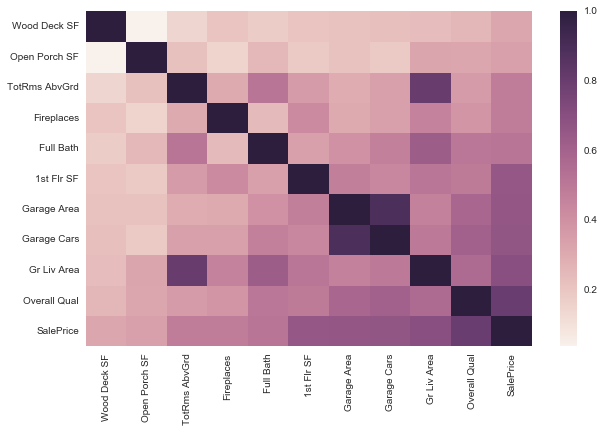

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_corrs)
plt.show()

# Train Linear Regression model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [12]:
# because Garage Cars is highly correlated with Garage Area, drop Garage Cars
# because TotRms AbvGrd is highly correlated with Gr Liv Area, drop TotRms AbvGrd
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
features = final_corr_cols.drop(['SalePrice']).index
target = 'SalePrice'

clean_test = test[final_corr_cols.index].dropna()

In [13]:
lr = LinearRegression()
lr.fit(train[features], train[target])

/Users/jeffrey.sternberg/Code/dataquest/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
train_predictions = lr.predict(train[features])
train_mse = mean_squared_error(train_predictions, train[target])
train_rmse = np.sqrt(train_mse)
print(train_rmse)

34173.9762919


In [15]:
test_predictions = lr.predict(clean_test[features])
test_mse = mean_squared_error(test_predictions, clean_test[target])
test_rmse = np.sqrt(test_mse)
print(test_rmse)

41032.0261202


# Normalize / Feature Scaling

In [16]:
# https://en.wikipedia.org/wiki/Feature_scaling
# scale to [0,1] --> x - min / max - min
train_scaled = train[features].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)
train_scaled.head()

,Wood Deck SF,Open Porch SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual
0,0.314371,0.113346,0.666667,0.25,0.552496,0.354839,0.404731,0.555556
1,0.209581,0.000000,0.000000,0.25,0.225473,0.490591,0.158458,0.444444
2,0.588323,0.065814,0.000000,0.25,0.411790,0.209677,0.298769,0.555556
3,0.000000,0.000000,0.666667,0.50,0.747849,0.350806,0.551847,0.666667
4,0.317365,0.062157,0.333333,0.50,0.239243,0.323925,0.395982,0.444444


In [17]:
sorted_vars = train_scaled.var().sort_values()
sorted_vars

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64

In [18]:
# use sklearn for the same thing (defaults to range 0, 1)
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
train_scaled = min_max_scaler.fit_transform(train[features])
train_scaled = pd.DataFrame(train_scaled, columns=train[features].columns)
train_scaled.head()

,Wood Deck SF,Open Porch SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual
0,0.314371,0.113346,0.666667,0.25,0.552496,0.354839,0.404731,0.555556
1,0.209581,0.000000,0.000000,0.25,0.225473,0.490591,0.158458,0.444444
2,0.588323,0.065814,0.000000,0.25,0.411790,0.209677,0.298769,0.555556
3,0.000000,0.000000,0.666667,0.50,0.747849,0.350806,0.551847,0.666667
4,0.317365,0.062157,0.333333,0.50,0.239243,0.323925,0.395982,0.444444


In [19]:
sorted_vars = train_scaled.var().sort_values()
sorted_vars

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64

In [20]:
train_scaled.describe()

,Wood Deck SF,Open Porch SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.138207,0.084983,0.198402,0.391438,0.335449,0.318119,0.351245,0.567580
std,0.181836,0.118058,0.215846,0.136459,0.160668,0.142642,0.151916,0.156512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.250000,0.211704,0.224798,0.238091,0.444444
50%,0.000000,0.047532,0.333333,0.500000,0.307229,0.322581,0.339274,0.555556
75%,0.251497,0.127971,0.333333,0.500000,0.434703,0.387097,0.429439,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# dataquest suggests this formula, which doesn't appear correct.
train_scaled = train[features]/train[features].max()
train_scaled.describe()

,Wood Deck SF,Open Porch SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.138207,0.084983,0.198402,0.391438,0.427145,0.318119,0.426837,0.610822
std,0.181836,0.118058,0.215846,0.136459,0.138498,0.142642,0.134215,0.140861
min,0.000000,0.000000,0.000000,0.000000,0.137982,0.000000,0.116519,0.100000
25%,0.000000,0.000000,0.000000,0.250000,0.320475,0.224798,0.326868,0.500000
50%,0.000000,0.047532,0.333333,0.500000,0.402819,0.322581,0.416261,0.600000
75%,0.251497,0.127971,0.333333,0.500000,0.512704,0.387097,0.495920,0.700000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Drop low variance features and re-train

In [22]:
features = features.drop('Open Porch SF')
features

Index(['Wood Deck SF', 'Fireplaces', 'Full Bath', '1st Flr SF', 'Garage Area',
       'Gr Liv Area', 'Overall Qual'],
      dtype='object')

In [23]:
lr = LinearRegression()
lr.fit(train[features], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
train_predictions = lr.predict(train[features])
train_mse = mean_squared_error(train_predictions, train[target])
train_rmse = np.sqrt(train_mse)
print(train_rmse)

34372.6967078


In [25]:
test_predictions = lr.predict(clean_test[features])
test_mse = mean_squared_error(test_predictions, clean_test[target])
test_rmse = np.sqrt(test_mse)
print(test_rmse)

40591.4270244
